In [1]:
from abstractsim import *
import numpy as np
from paper_result import *
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def year_distri():
    # For Year wise distribution of papers
    fil = open('./../src/AAN/acl-metadata.txt','rb')

    year_distri = {}
    for line in fil.readlines():
        try:
            line = line.decode()
            # print(line)
            if len(line.split()) != 0 and line.split()[0] == 'year':
                year_distri[line.split()[2][1:-1]] = 1 if line.split()[2][1:-1] not in year_distri \
                else year_distri[line.split()[2][1:-1]]+1
        except:
            # print("year : {}".format(line))
            pass
    fil.close()
    return year_distri

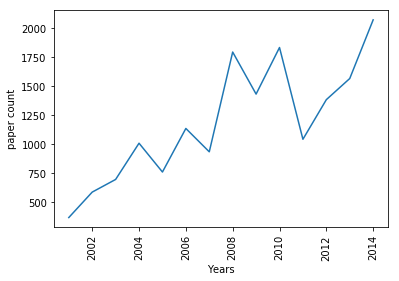

In [3]:
year_dict = year_distri()
custom_years = dict()
# print(year_dict)
for i in range(14):
    try:
        custom_years[2014-i] = year_dict[str(2014-i)]
    except:
        custom_years[2014-i] = year_dict[str(201)]

# print(custom_years)
lists = sorted(custom_years.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure()
plt.xticks(rotation=90)
plt.xlabel('Years', fontsize=10)
plt.ylabel('paper count', fontsize=10)
plt.plot(x, y)
plt.show()
fig.suptitle('yearwise-paper', fontsize=20)
fig.savefig('graphs/' + 'yearwise-paper.jpg')

In [4]:
def author_distri():
    # For Authorwise Paper distribution
    author_distri = {}
    mfil = open('./../src/AAN/author_ids.txt','r')
    author_ids = {}
    for author in mfil.readlines():
        ids, name = author.split("\t")
        author_ids[name] = ids

    fil = open('./../src/AAN/acl-metadata.txt','rb')
    for line in fil.readlines():
        try:
            line = line.decode().split()
            if len(line) != 0 and line[0] == 'author':
                line = line[2][1:-1].split(";")
                for auth in line:
                    author_distri[auth] = 1 if auth not in author_distri else author_distri[auth]+1
        except:
            pass
    return author_distri

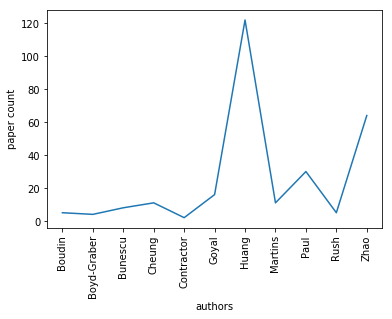

In [5]:
author_dict = author_distri()
custom_dict = dict()
# print(year_dict)
i = 0
for author in author_dict:
    custom_dict[author] = author_dict[author]
    if i == 10:
        break
    i+= 1
fig = plt.figure()
lists = sorted(custom_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure()
plt.xticks(rotation=90)
plt.xlabel('authors', fontsize=10)
plt.ylabel('paper count', fontsize=10)
plt.plot(x, y)
plt.show()
fig.suptitle('authorwize-paper', fontsize=20)
fig.savefig('graphs/' + 'authorwize-paper.jpg')

In [6]:
def active_distri():
    data = extract_data()
    fil = open('./../src/topic_paper.txt','r')
    topic_distri = dict()
    
    paper_year = dict()
    for paper in data:
        if len(paper) > 0 :
            if len(paper) == 5:
                paper_year[paper[0]] = paper[4]
            else:
                paper_year[paper[0]] = paper[3]
    
    for line in fil.readlines():
        paper_id = line.split(',')[0]
        if paper_id not in paper_year:
            continue
        year = paper_year[paper_id]
        topic = line.split(',')[1]
        if topic not in topic_distri:
            topic_distri[topic] = dict()
        if year not in topic_distri[topic]:
            topic_distri[topic][year] = 1.0
        else:
            topic_distri[topic][year] += 1.0
    return topic_distri

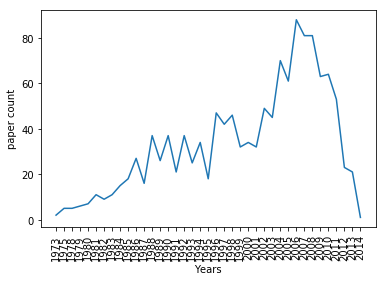

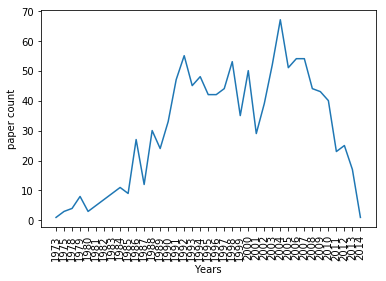

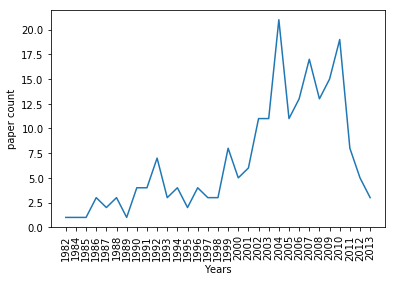

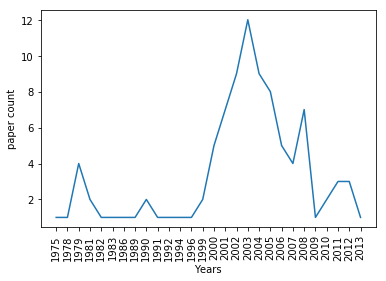

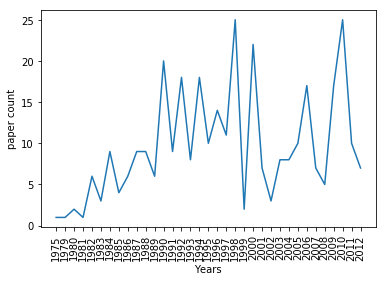

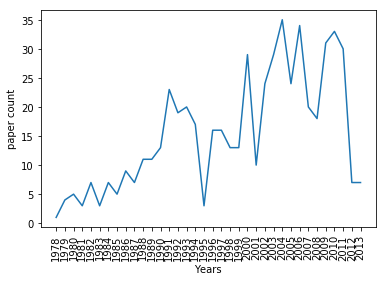

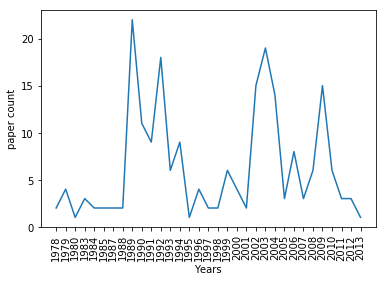

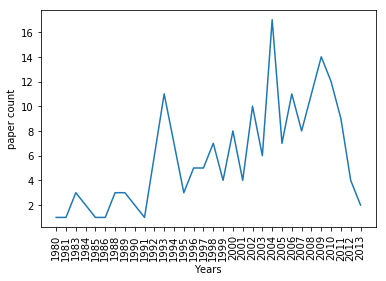

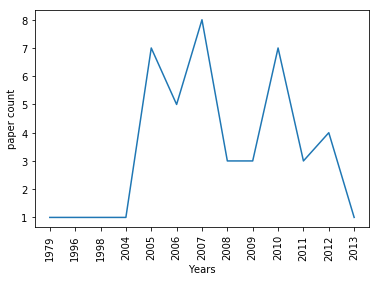

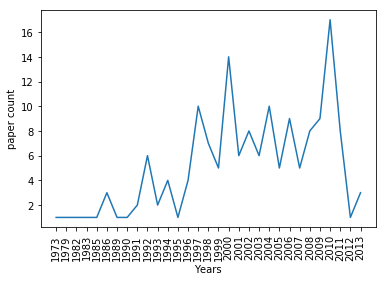

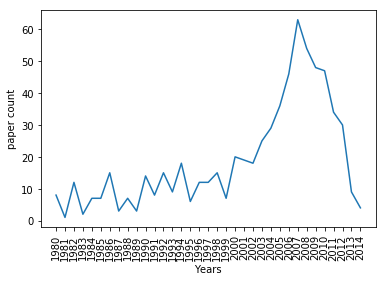

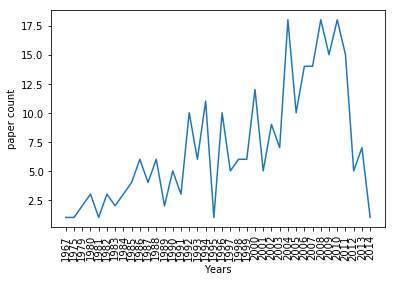

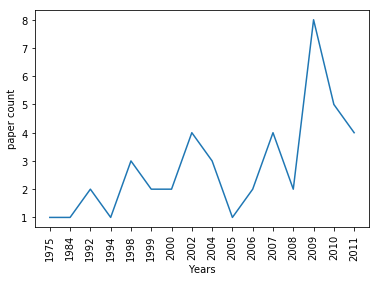

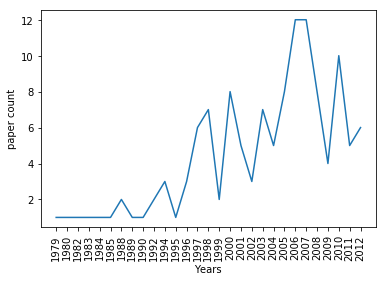

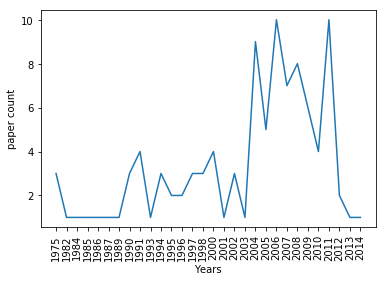

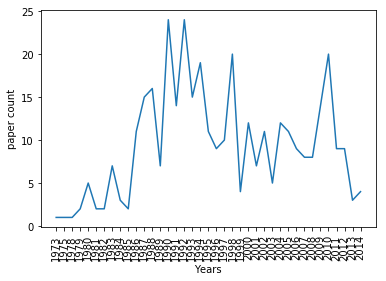

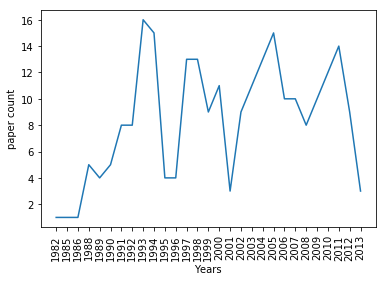

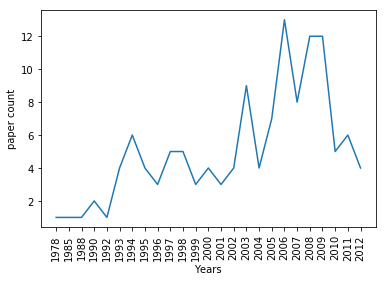

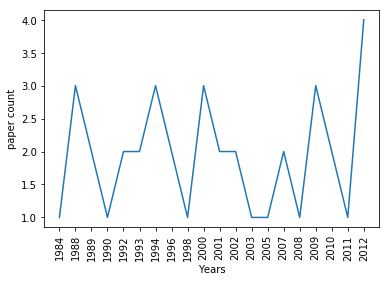

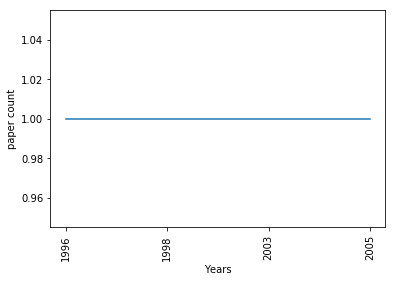

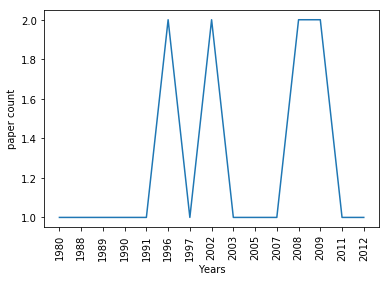

In [10]:
active_dict = active_distri()
for custom_dict in active_dict:
    lists = sorted(active_dict[custom_dict].items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    fig = plt.figure()
    plt.xlabel('Years', fontsize=10)
    plt.ylabel('paper count', fontsize=10)
    plt.xticks(rotation=90)
    plt.plot(x, y)
    plt.show()
    fig.suptitle(custom_dict, fontsize=20)
    fig.savefig('graphs/' + str(custom_dict) + '.jpg')

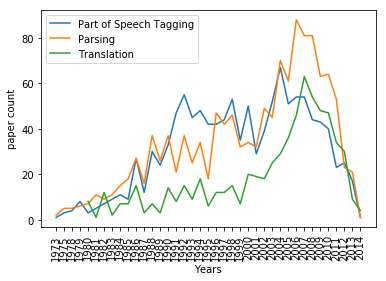

In [15]:
# for common graph
fig = plt.figure()
plt.xlabel('Years', fontsize=10)
plt.ylabel('paper count', fontsize=10)
plt.xticks(rotation=90)

lists = sorted(active_dict['Part of Speech Tagging\n'].items())
x,y = zip(*lists)
plt.plot(x,y,label='Part of Speech Tagging')

lists = sorted(active_dict['Parsing\n'].items())
x,y = zip(*lists)
plt.plot(x,y,label='Parsing')

lists = sorted(active_dict['Translation\n'].items())
x,y = zip(*lists)
plt.plot(x,y,label='Translation')

plt.legend()
plt.show()

fig.suptitle('common_topic', fontsize=20)
fig.savefig('graphs/' + 'common_topic.jpg')